In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#create data

In [4]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

In [22]:
Weights = tf.Variable(tf.random_uniform([1],-1,1))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data+biases

loss = tf.reduce_mean(tf.square(y-y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [23]:
sess = tf.Session()
sess.run(init)

In [24]:
for step in range(201):
    sess.run(train)
    if step %20 ==0:
        print(step,sess.run(Weights),sess.run(biases))

0 [0.79289526] [-0.11559065]
20 [0.2829901] [0.20075157]
40 [0.1471912] [0.27440488]
60 [0.11217009] [0.29339933]
80 [0.10313853] [0.29829776]
100 [0.1008094] [0.29956102]
120 [0.10020874] [0.2998868]
140 [0.10005383] [0.2999708]
160 [0.10001388] [0.29999247]
180 [0.10000359] [0.29999807]
200 [0.10000093] [0.2999995]


In [3]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])
product = tf.matmul(matrix1,matrix2)

with tf.Session() as sess:
    result = sess.run(product)
    print(result)


[[12]]


In [11]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run(output,feed_dict = {input1:[7.],input2:[2.]}))

[14.]


In [14]:
import tensorflow as tf
import numpy as np
# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3
# create tensorflow structure
Weights = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))
biases = tf.Variable(tf.zeros((1,)))
loss = lambda: tf.keras.losses.MSE(y_data, Weights * x_data + biases)  # alias: tf.losses.mse
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)  # alias: tf.optimizers.SGD
for step in range(201):
    optimizer.minimize(loss, var_list=[Weights, biases])
    if step % 20 == 0:
        print("{} step, weights = {}, biases = {}, loss = {}".format(step, Weights.read_value(), biases.read_value(), loss()))  # read_value函数可用numpy替换

0 step, weights = Tensor("Identity_44:0", shape=(1,), dtype=float32), biases = Tensor("Identity_45:0", shape=(1,), dtype=float32), loss = Tensor("Mean_425:0", shape=(), dtype=float32)
20 step, weights = Tensor("Identity_46:0", shape=(1,), dtype=float32), biases = Tensor("Identity_47:0", shape=(1,), dtype=float32), loss = Tensor("Mean_446:0", shape=(), dtype=float32)
40 step, weights = Tensor("Identity_48:0", shape=(1,), dtype=float32), biases = Tensor("Identity_49:0", shape=(1,), dtype=float32), loss = Tensor("Mean_467:0", shape=(), dtype=float32)
60 step, weights = Tensor("Identity_50:0", shape=(1,), dtype=float32), biases = Tensor("Identity_51:0", shape=(1,), dtype=float32), loss = Tensor("Mean_488:0", shape=(), dtype=float32)
80 step, weights = Tensor("Identity_52:0", shape=(1,), dtype=float32), biases = Tensor("Identity_53:0", shape=(1,), dtype=float32), loss = Tensor("Mean_509:0", shape=(), dtype=float32)
100 step, weights = Tensor("Identity_54:0", shape=(1,), dtype=float32), bias

In [15]:
import tensorflow as tf
import numpy as np
# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3
# create tensorflow structure
Weights = tf.Variable(tf.random.uniform((1,), -1.0, 1.0))
biases = tf.Variable(tf.zeros((1,)))
@tf.function
def loss():
    return tf.keras.losses.MSE(y_data, Weights * x_data + biases)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)  # alias: tf.optimizers.SGD
for step in range(201):
    optimizer.minimize(loss, var_list=[Weights, biases])
    if step % 20 == 0:
        print("{} step, weights = {}, biases = {}".format(step, Weights.read_value(), biases.read_value()))  # read_value函数可用numpy替换

0 step, weights = Tensor("Identity_66:0", shape=(1,), dtype=float32), biases = Tensor("Identity_67:0", shape=(1,), dtype=float32)
20 step, weights = Tensor("Identity_68:0", shape=(1,), dtype=float32), biases = Tensor("Identity_69:0", shape=(1,), dtype=float32)
40 step, weights = Tensor("Identity_70:0", shape=(1,), dtype=float32), biases = Tensor("Identity_71:0", shape=(1,), dtype=float32)
60 step, weights = Tensor("Identity_72:0", shape=(1,), dtype=float32), biases = Tensor("Identity_73:0", shape=(1,), dtype=float32)
80 step, weights = Tensor("Identity_74:0", shape=(1,), dtype=float32), biases = Tensor("Identity_75:0", shape=(1,), dtype=float32)
100 step, weights = Tensor("Identity_76:0", shape=(1,), dtype=float32), biases = Tensor("Identity_77:0", shape=(1,), dtype=float32)
120 step, weights = Tensor("Identity_78:0", shape=(1,), dtype=float32), biases = Tensor("Identity_79:0", shape=(1,), dtype=float32)
140 step, weights = Tensor("Identity_80:0", shape=(1,), dtype=float32), biases = T

In [6]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

%matplotlib qt5
def add_layer(inputs,in_size,out_size,activation_function = None):
    Weights = tf.Variable(tf.random_normal((in_size,out_size)))
    biases = tf.Variable(tf.zeros((1,out_size))+0.1)

    Wx_plus_b = tf.matmul(inputs,Weights) + biases

    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

l1 = add_layer(xs,1,10,activation_function = tf.nn.relu)
prediction = add_layer(l1,10,1,activation_function=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data,y_data)
    plt.ion()
    plt.show()

    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            
            prediction_value = sess.run(prediction,feed_dict={xs:x_data})
            lines = ax.plot(x_data,prediction_value,'r-',lw=5)
            plt.pause(0.1)


            #print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))




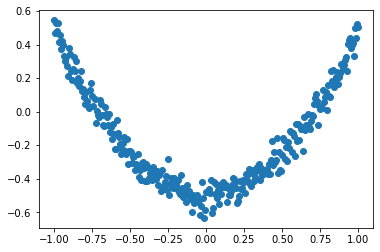

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)

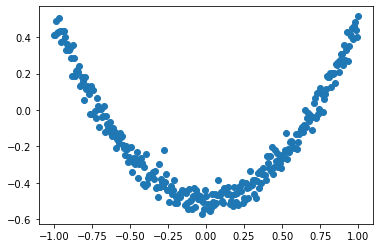

In [3]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt

tf.disable_v2_behavior()


def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal((in_size, out_size)))
    biases = tf.Variable(tf.zeros((1, out_size)) + 0.1)

    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_data, y_data)
    plt.ion()
    plt.show()

    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
                #print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
                try:
                    ax.lines.remove(lines[0])
                except Exception:
                    pass
                prediction_value = sess.run(prediction, feed_dict={xs: x_data})
                lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
                plt.pause(0.1)

In [10]:
tf.random_normal((1,10))

Tensor("random_normal_6:0", shape=(1, 10), dtype=float32)


In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from datetime import datetime
logdir = "logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# 拟合数据的创建
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
x_data = x_data.astype(np.float32)
noise = noise.astype(np.float32)
y_data = y_data.astype(np.float32)
# print(x_data.shape)
# 定义一个一个模型
model = keras.models.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.01),
    loss='mse')
model.fit(x_data, y_data, epochs=100, callbacks=[tensorboard_callback])

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 556us/sample - loss: 0.1372
Epoch 2/100
300/300 [==============================] - 0s 30us/sample - loss: 0.1034
Epoch 3/100
300/300 [==============================] - 0s 27us/sample - loss: 0.0872
Epoch 4/100
300/300 [==============================] - 0s 30us/sample - loss: 0.0781
Epoch 5/100
300/300 [==============================] - 0s 33us/sample - loss: 0.0725
Epoch 6/100
300/300 [==============================] - 0s 27us/sample - loss: 0.0684
Epoch 7/100
300/300 [==============================] - 0s 33us/sample - loss: 0.0650
Epoch 8/100
300/300 [==============================] - 0s 30us/sample - loss: 0.0622
Epoch 9/100
300/300 [==============================] - 0s 37us/sample - loss: 0.0596
Epoch 10/100
300/300 [==============================] - 0s 33us/sample - loss: 0.0570
Epoch 11/100
300/300 [==============================] - 0s 27us/sample - loss: 0.0548
Epoch 12/100
300/300 [===================